# 1. Import the necessary packages to use in this project


# 2. Lets load our data from the directory
Print to check if it is the correct directory
Windows uses \\ in their dir while MacOS or Linux uses //

I have 300 images of left, right and centre direction

# 3. Create an empty array called 'categories'& Put data into DataFrame (2D array table)
Category names are left, right and centre. 
*Arrays must be same length, we name as l,r and c
Now we assign an integer according to the categories assigned

In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# Lets get our data from directory
# Print to check if it is the correct directory
print(os.listdir('TrackImage0\\data'))

# Set path to access our directory
filenames = os.listdir('TrackImage0\\data')

# Create an empty array called 'categories'
# Category names are r, l and c for left right centre *Arrays must be same length thus l,r,c
# Since we have renamed our files to l,r,c ,we split the images into categories based on their filename

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'l': 
        categories.append(0)  #The categories are set as labels
    elif category == 'r': 
        categories.append(1)
    elif category == 'c':
        categories.append(2)
        
        
# Store filename and category in dataframe       
df = pd.DataFrame({
    'filename': filenames,  
    'category': categories,  
})

df


Using TensorFlow backend.


['c.0.jpg', 'c.1.jpg', 'c.10.jpg', 'c.11.jpg', 'c.12.jpg', 'c.13.jpg', 'c.14.jpg', 'c.15.jpg', 'c.16.jpg', 'c.17.jpg', 'c.18.jpg', 'c.19.jpg', 'c.2.jpg', 'c.20.jpg', 'c.21.jpg', 'c.22.jpg', 'c.23.jpg', 'c.24.jpg', 'c.25.jpg', 'c.26.jpg', 'c.27.jpg', 'c.28.jpg', 'c.29.jpg', 'c.3.jpg', 'c.30.jpg', 'c.31.jpg', 'c.32.jpg', 'c.33.jpg', 'c.34.jpg', 'c.35.jpg', 'c.36.jpg', 'c.37.jpg', 'c.38.jpg', 'c.39.jpg', 'c.4.jpg', 'c.40.jpg', 'c.41.jpg', 'c.42.jpg', 'c.43.jpg', 'c.44.jpg', 'c.45.jpg', 'c.46.jpg', 'c.47.jpg', 'c.48.jpg', 'c.49.jpg', 'c.5.jpg', 'c.50.jpg', 'c.51.jpg', 'c.52.jpg', 'c.53.jpg', 'c.54.jpg', 'c.55.jpg', 'c.56.jpg', 'c.57.jpg', 'c.58.jpg', 'c.59.jpg', 'c.6.jpg', 'c.60.jpg', 'c.61.jpg', 'c.62.jpg', 'c.63.jpg', 'c.64.jpg', 'c.65.jpg', 'c.66.jpg', 'c.67.jpg', 'c.68.jpg', 'c.69.jpg', 'c.7.jpg', 'c.70.jpg', 'c.71.jpg', 'c.72.jpg', 'c.73.jpg', 'c.74.jpg', 'c.75.jpg', 'c.76.jpg', 'c.77.jpg', 'c.78.jpg', 'c.79.jpg', 'c.8.jpg', 'c.80.jpg', 'c.81.jpg', 'c.82.jpg', 'c.83.jpg', 'c.84.jpg', 

,filename,category
0,c.0.jpg,2
1,c.1.jpg,2
2,c.10.jpg,2
3,c.11.jpg,2
4,c.12.jpg,2
...,...,...
295,r.95.jpg,1
296,r.96.jpg,1
297,r.97.jpg,1
298,r.98.jpg,1


Lets see total images in each category

2    100
1    100
0    100
Name: category, dtype: int64

 Total images:  300


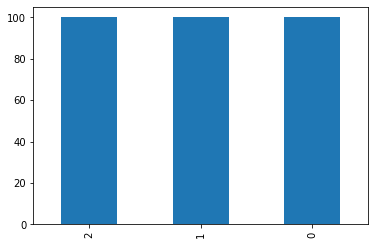

In [4]:
df['category'].value_counts().plot.bar()
print(df['category'].value_counts())

print("\n Total images: ", df.shape[0])

Lets see a sample of our image

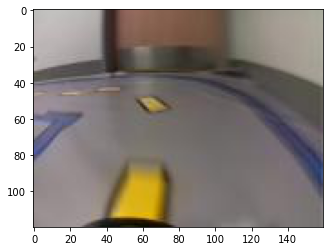

In [5]:
sample = random.choice(filenames)
image = load_img('TrackImage0\\data\\'+sample)
plt.imshow(image)

# 4. For our image classifier, we will create a Convolutional Neural Network which is best suited for learning images.
You can try training without BatchNorm and Dropout layers, to see what happens.
BatchNorm and Dropout is used to reduce overfitting (Val loss higher than train loss in graph below)

The number beside Conv2D are the amount of features to extract
Flatten layer is used to combine all extracted features 
Final Dense layer is 3 because we have 3 classes to classify. 

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(Dropout(0.6)) #0.6
model.add(MaxPooling2D(pool_size=(2, 2)))                                

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.6)) #0.6
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.65)) #0.6
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(768, activation='relu')) #original 768
model.add(Dropout(0.8)) #0.8
model.add(Dense(3, activation='softmax')) # 3 because we have car, dog and cat classes

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Shows summary of all layers
model.summary()

INFO:plaidml:Opening device "opencl_amd_bristol_ridge.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
__________

# 5. Get callback for early stopping
Use ReduceLR to reduce learning rate when metric not improving

In [7]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(patience=5)

callbacks = [earlystop]

Use ImageGenerator to convert data to 1 hot encoding

In [8]:
df["category"] = df["category"].replace({ 0: 'l', 1: 'r', 2: 'c' })

# 6. Lets split our files into 80% train and 20% validation. This is common practice in CNN.
Set state=0 to prevent random splitting

c    80
l    80
r    80
Name: category, dtype: int64

 Total train images:  240


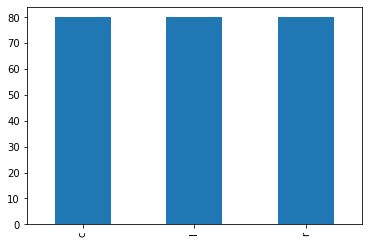

In [9]:
# Lets split our files into 80% train and 20% validation
# state 0 to prevent random splitting

train_df, validate_df = train_test_split(df, test_size=0.20, random_state=0) 


# Lets see total 'TRAIN' files and in each category

train_df = train_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()
print(train_df['category'].value_counts())
print("\n Total train images: ", train_df.shape[0])

r    20
c    20
l    20
Name: category, dtype: int64

 Total validate images:  60


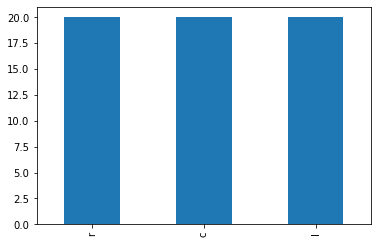

In [10]:
# Lets see total 'VALIDATE' files and in each category

validate_df = validate_df.reset_index(drop=True)
validate_df['category'].value_counts().plot.bar()

print(validate_df['category'].value_counts())
print("\n Total validate images: ", validate_df.shape[0])

In [11]:
# Get total train and validate, and batch size to fit model

total_train = train_df.shape[0]
print("Total train images:", total_train)

total_validate = validate_df.shape[0] 
print("Total validate images:", total_validate)

Total train images: 240
Total validate images: 60


# 7. Using Data augmentation will help us to artificially increase our dataset by 3 times or more.
You can refer to the link here to understand more about the features of data augmentation - 
https://mc.ai/image-data-augmentation-image-processing-in-tensorflow-part-2/

In [12]:
# Use Data augmentation on the train set

train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    brightness_range = [0.8,0.8]
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create train and valdiation generator
# From data folder, we split the data into train and validate. 
# The image in train and validate are taken from data, BUT do not contain the same images
# I checked by running 'submission.validate_df(copy)/train_df(copy)'

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "TrackImage0\\data\\", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=20
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "TrackImage0\\data\\", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=20
)

Found 240 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.


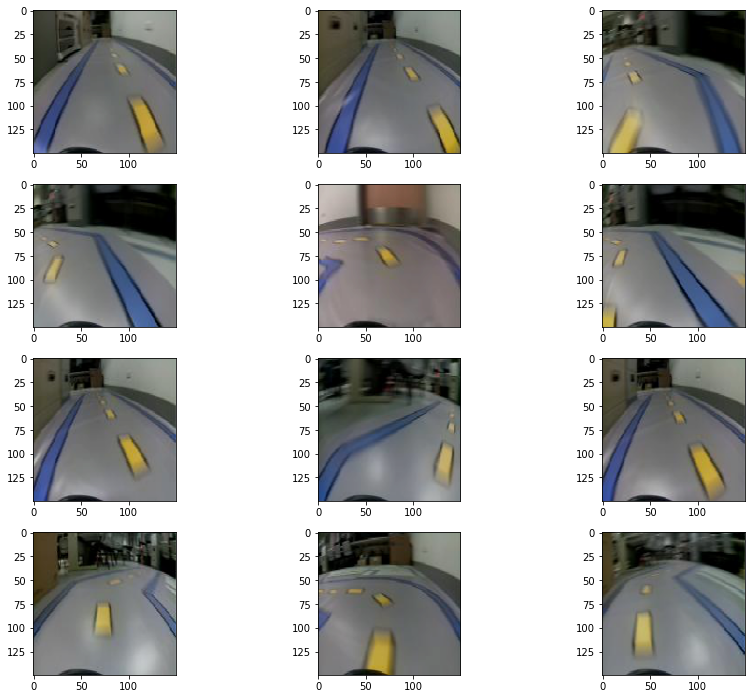

In [13]:
# Lets take a look at how augmented images from train generator look like

plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# 8. Train the model

In [14]:
# Training the model

epochs=20
batch_size=20

history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate/batch_size,
    steps_per_epoch=total_train/batch_size,
    callbacks=callbacks
)

Epoch 1/20


INFO:plaidml:Analyzing Ops: 88 of 301 operations complete
INFO:plaidml:Analyzing Ops: 104 of 301 operations complete


12/12 [==============================] - 58s 5s/step - loss: 2.4966 - acc: 0.3917 - val_loss: 1.0878 - val_acc: 0.6500
Epoch 2/20
12/12 [==============================] - 21s 2s/step - loss: 0.7374 - acc: 0.7125 - val_loss: 0.8476 - val_acc: 0.7333
Epoch 3/20
12/12 [==============================] - 25s 2s/step - loss: 0.3976 - acc: 0.8625 - val_loss: 0.6866 - val_acc: 0.7667
Epoch 4/20
12/12 [==============================] - 20s 2s/step - loss: 0.2402 - acc: 0.9083 - val_loss: 0.6549 - val_acc: 0.8167
Epoch 5/20
12/12 [==============================] - 19s 2s/step - loss: 0.1791 - acc: 0.9417 - val_loss: 0.5192 - val_acc: 0.9000
Epoch 6/20
12/12 [==============================] - 21s 2s/step - loss: 0.1591 - acc: 0.9458 - val_loss: 0.4891 - val_acc: 0.9000
Epoch 7/20
12/12 [==============================] - 19s 2s/step - loss: 0.1630 - acc: 0.9583 - val_loss: 0.4656 - val_acc: 0.9333
Epoch 8/20
12/12 [==============================] - 19s 2s/step - loss: 0.0947 - acc: 0.9750 - val_lo

# 9. Plot graph for train/val loss & train/val acc
Usually, low train & val loss + high acc * val acc = well predicted model.
Overfitting occurs if validation loss is higher than training loss.
Spikes are caused by a few reasons - insufficient data/learning rate value

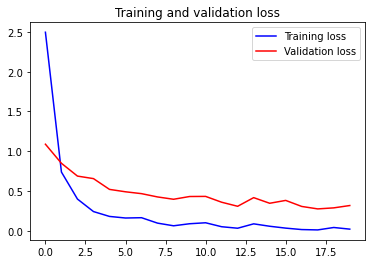

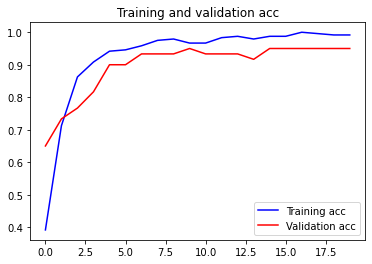

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, accuracy, 'blue', label='Training acc')
plt.plot(epochs, val_accuracy, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.show()

# 10. Save the trained model to re-use without having to re-train

# 11. Load saved model

You can set any filename you like, I set mine as 'TrackImage0(Draft1)' 
*Comment away the load command before saving, vice-versa for loading model.
*Comment away the model.fit code and graph plot code when loading model as you wont need them

In [19]:
"""
model.save('TrackImage0(Draft1).hdf5')  # creates a HDF5 file 'my_model.h5'
"""

from keras import models    
model = models.load_model('TrackImage0(Draft1).hdf5', compile = False)

# 12. Prepare test data
You can specify a different folder to predict on different kinds of image.

I will check if my model needs fine tuning. To do this, test on your 'trained data'.
Most of the time, CNN networks which test on 'trained data' should predict all trained data correctly.

In [21]:
# Prepare test data

#original is TrackImage2\\test
test_filenames = os.listdir("TrackImage0\\data")
test_df = pd.DataFrame({
    'filename': test_filenames
})

# Check total images in test folder
total_test = test_df.shape[0]  
print("Total amount of test images are:", total_test)

Total amount of test images are: 300


# 13. Create test generator
Batch_size is 1 to run through every image since we have small dataset

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    "TrackImage0\\data\\", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(150,150),
    batch_size=batch_size,
    shuffle=False 
)

Found 300 validated image filenames.


# 14. Prediction of test data
np.ceil to round off array value to whole number
Use reset outputs in orderly manner

In [23]:
predict = model.predict_generator(test_generator, steps=np.ceil(total_test/batch_size))

# Get total predicteed images       

print("Number of predicted images:", len(predict), "\n")

# Get predictions in array
# These are labels 0, 1, 2 (category)
# Use [?:?] to specify range of index in list/array

print("    0:left          1:right       2:centre \n\n", predict, "\n")   

Number of predicted images: 300 

    0:left          1:right       2:centre 

 [[9.09208953e-01 6.86780810e-02 2.21129488e-02]
 [8.81294131e-01 7.60280415e-02 4.26777713e-02]
 [8.50234747e-01 1.00299694e-01 4.94656079e-02]
 [8.33344698e-01 9.97008756e-02 6.69544190e-02]
 [8.39954317e-01 1.07122585e-01 5.29231168e-02]
 [7.65654504e-01 1.61383867e-01 7.29616135e-02]
 [8.47139895e-01 9.34794545e-02 5.93806282e-02]
 [6.82161450e-01 2.36299276e-01 8.15393105e-02]
 [8.23991477e-01 9.87262130e-02 7.72823393e-02]
 [9.01384413e-01 6.13948219e-02 3.72207798e-02]
 [8.47564459e-01 8.06689560e-02 7.17665330e-02]
 [8.86664331e-01 8.44195634e-02 2.89160777e-02]
 [9.01384413e-01 6.13948219e-02 3.72207798e-02]
 [8.47274721e-01 8.62830207e-02 6.64421842e-02]
 [9.05329466e-01 5.99601120e-02 3.47104035e-02]
 [8.26819599e-01 1.04477502e-01 6.87029362e-02]
 [7.88496077e-01 1.56453311e-01 5.50505482e-02]
 [9.24938202e-01 4.81346026e-02 2.69270726e-02]
 [9.50716615e-01 3.13020572e-02 1.79814231e-02]
 [9.4938

# 15. Use np.argmax to get max value from array as predicted answer


In [24]:
test_df['category'] = np.argmax(predict, axis=-1) 

# Lets see the some predicted values for each category of images
# Use [?:?] to specify range 

print(test_df['category'][0:3]) 

0    0
1    0
2    0
Name: category, dtype: int64


# 16. Use train class indices for mapping

In [25]:
# See train and validation class indices, use train class indices for mapping

print(train_generator.class_indices) 
print(validation_generator.class_indices, "\n")

# Map labels 

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
print(label_map, "\n")

# See the output of mapped labels

print(test_df['category'][0:4], "\n")

# Lets replace letters with words to see better

test_df['category'] = test_df['category'].replace({ 'l': 'left', 'r': 'right', 'c': 'centre'}) 
print(test_df['category'][0:3])


{'c': 0, 'l': 1, 'r': 2}
{'c': 0, 'l': 1, 'r': 2} 

{0: 'c', 1: 'l', 2: 'r'} 

0    c
1    c
2    c
3    c
Name: category, dtype: object 

0    centre
1    centre
2    centre
Name: category, dtype: object


# 17. View the amount of predicted image in category assigned 
It seems that the model was able to predict well. This shows that our model does not need fine tuning. 

left      102
right      99
centre     99
Name: category, dtype: int64

Total predicted images: 300


'\n# Print prediction accuracy\npred acc = correct predicted - 100\nget correct predicted and wrong predicted\nthen get\n'

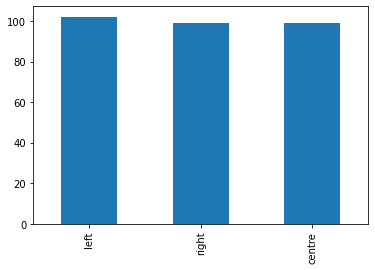

In [26]:
test_df['category'].value_counts()
print(test_df['category'].value_counts())

# View the above in a bar graph
test_df['category'].value_counts().plot.bar()

# Lets print the total predicted images 
print("\nTotal predicted images:", test_df.shape[0])

# 18. View predicted result with images
Calculate amt of subplot ( x * y = total value of plots displayed)
Some of our images are wrongly predicted, you can improve the prediction accuracy by changing the neural network model.
Perhaps you can add more convolutional & max pooling layers. Or check google for more tips on improving image predictions!

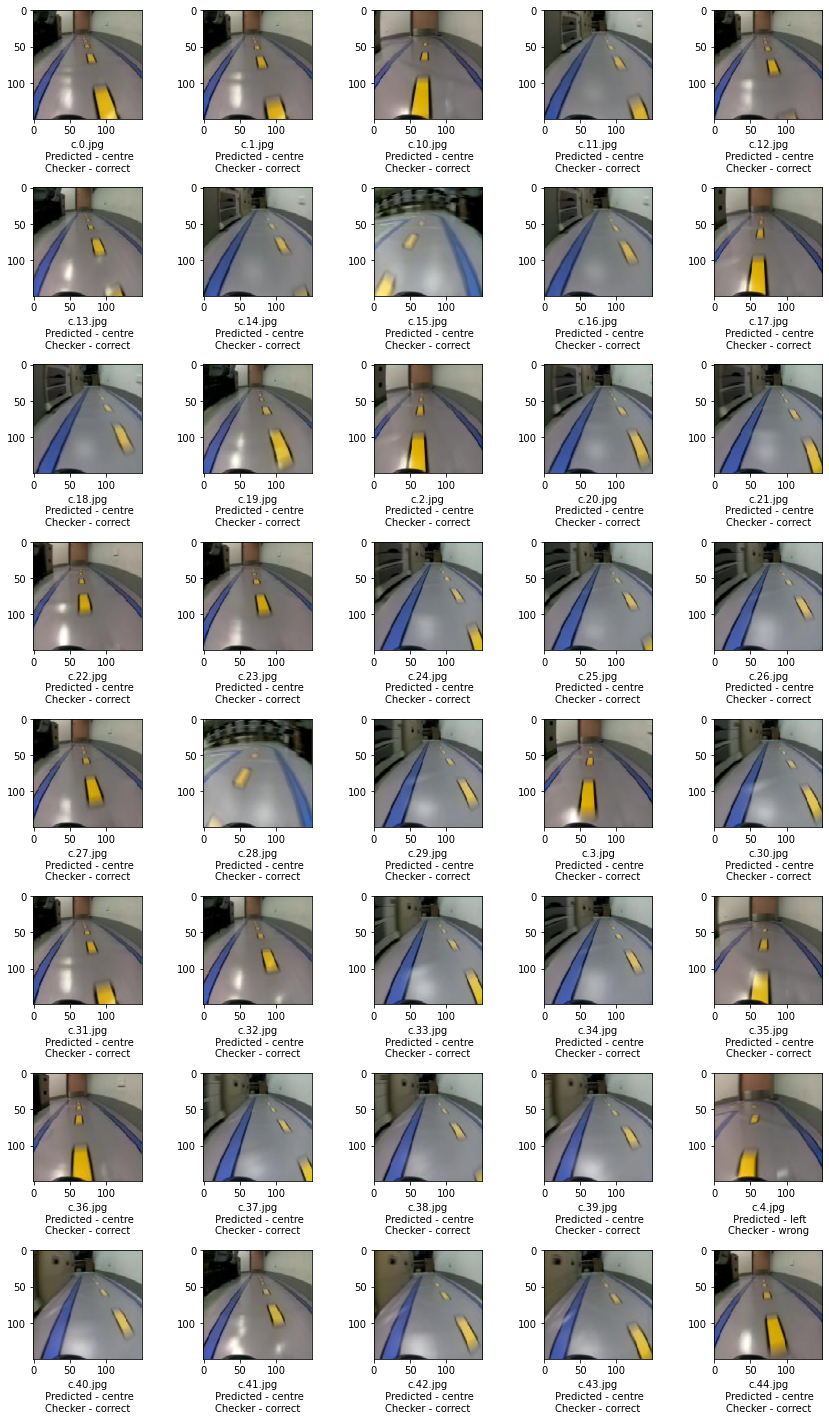

In [28]:
sample_test = test_df.head(40)
sample_test.head()
plt.figure(figsize=(12, 24))

for index, row in sample_test.iterrows():     
        filename = row['filename']
        category = row['category']
        img = load_img("TrackImage0\\data\\"+filename, target_size=(150,150))
        plt.subplot(10, 5, index+1)      
        plt.imshow(img) 
        if filename.split('.')[0] == category[0]:
            plt.xlabel(filename + "\n Predicted - " + "{}".format(category) + "\nChecker - correct")
        else:
            plt.xlabel(filename + "\n Predicted - " + "{}".format(category) + "\nChecker - wrong")
plt.tight_layout()
plt.show()


# 19. Lastly, save predictions into CSV file

In [30]:
# Save into CSV file to view results

submission_df = test_df.copy()
submission_df['id'] = submission_df['filename']
submission_df['predictions'] = submission_df['category']  #label

submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('TrackImage0(testacc11)).csv', index=False)

submission_df.head(300)